# pLDDT analysis
## Import libraries

In [ ]:
import os
from pathlib import Path
os.chdir(str(Path(os.getcwd()).parent))
from utils.read_files import read_ost_scores
from utils.score import get_sec_struc, get_plddt
import pandas as pd
import matplotlib.pyplot as plt

## Define constants

In [ ]:
SMALL_SIZE = 30
BIGGER_SIZE = 30
AXES_SIZE = 20
LEGEND_SIZE = 15
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=AXES_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=AXES_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=LEGEND_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.figsize"] = (12, 9)
markers = ["o", "s", "P", "*", "D", "<", "h", ">"]

secondary_structures = {
    "H": "Alpha helix (4-12)",
    "B": "Isolated beta-bridge residue",
    "E": "Strand",
    "G": "3-10 helix",
    "I": "Pi helix",
    "T": "Turn",
    "S": "Bend",
    "-": "None",
}

## Fetch data
### Define functions

In [ ]:
def get_best_pdb(folder):
    best_pdbs = list(folder.glob("**/*unrelaxed_rank_001*6217.pdb"))
    if len(best_pdbs) > 0:
        return best_pdbs[0]
    # return another pdb
    print(folder)
    return list(folder.glob("**/*.pdb"))[0]


def get_dataframe_case(identifier, plddt_folder, ost_folder, struc_folder):
    ost_path = ost_folder / "ost_scores.json"
    plddt_path = get_best_pdb(plddt_folder)
    struc_path = get_best_pdb(struc_folder)
    sec_strucs_df = get_sec_struc(struc_path)
    plddt_df = get_plddt(str(plddt_path))
    lddt = read_ost_scores(ost_path, True)["local_lddt"]
    concat_df = pd.concat([sec_strucs_df, plddt_df, lddt], axis=1)
    concat_df["struc_struc"] = concat_df["struc_struc"].replace(secondary_structures)
    return concat_df


def get_dataframe_folder(cases_folder, plddt_folder, ost_folder, struc_folder):
    cases = [Path(str(case.name)[:-4]) for case in cases_folder.glob("**/*.pdb")]
    case_dfs = [
        get_dataframe_case(case, plddt_folder / case, ost_folder / case, struc_folder)
        for case in cases
    ]
    concat_df = pd.concat(case_dfs, ignore_index=True, sort=False)
    return concat_df

### Fetch data

In [1]:
cases_folder = Path("/data/jgut/template-analysis/CASP14")
ost_folder = Path("/data/jgut/template-analysis/CASP14_TEMPLATE_AF")
struc_folder = Path("/data/jgut/template-analysis/CASP14")
plddt_folder = Path("/data/jgut/template-analysis/CASP14_AF_FULL")
concat_df = get_dataframe_folder(cases_folder, plddt_folder, ost_folder, struc_folder)
concat_df

@> 1467 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 833 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 949 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 1189 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 887 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1922 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 569 atoms and 1 coordinate set(s) were parsed in 0.00s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 2057 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1073 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1497 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1353 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 1581 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 604 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 596 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 824 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 5122 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 5263 atoms and 1 coordinate set(s) were parsed in 0.03s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 562 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 2158 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 980 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 829 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 2234 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1337 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1770 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 939 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 787 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 4714 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2533 atoms and 1 coordinate set(s) were parsed in 0.02s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 951 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1256 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 3626 atoms and 1 coordinate set(s) were parsed in 0.02s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 3487 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1322 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 3032 atoms and 1 coordinate set(s) were parsed in 0.02s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 3934 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1268 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 3205 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3813 atoms and 1 coordinate set(s) were parsed in 0.02s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 786 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1551 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 2414 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 2911 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2902 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1335 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1352 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 2242 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1120 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 4003 atoms and 1 coordinate set(s) were parsed in 0.02s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 3273 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2439 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1019 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1148 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 4280 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 777 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 1510 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 6304 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1103 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 710 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 1029 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14
/data/jgut/template-analysis/CASP14


@> 2304 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1222 atoms and 1 coordinate set(s) were parsed in 0.01s.


/data/jgut/template-analysis/CASP14


,struc_resname,struc_struc,af_pLDDT,af_resnum,af_resname,local_lddt
0,VAL,None,40.47,1.0,VAL,0.768
1,SER,None,32.53,2.0,SER,0.681
2,ASP,None,43.12,3.0,ASP,0.759
3,LEU,Bend,45.69,4.0,LEU,0.705
4,PRO,3-10 helix,53.22,5.0,PRO,0.864
...,...,...,...,...,...,...
17363,ILE,None,NaN,NaN,NaN,NaN
17364,PRO,None,NaN,NaN,NaN,NaN
17365,LYS,None,NaN,NaN,NaN,NaN
17366,THR,None,NaN,NaN,NaN,NaN


### Wrangle data

In [3]:
concat_df[concat_df["af_pLDDT"].notna()].to_csv(
    "/data/jgut/template-analysis/correlations/CASP14_sec_struc.csv"
)
concat_df_full = concat_df
concat_df = concat_df_full[
    (concat_df_full["af_pLDDT"].notna()) & (concat_df_full["struc_struc"].notna())
].sample(frac=1)
concat_df = concat_df.head(200)

## Plotting

struc_struc
Strand                          88
None                            51
Bend                            25
Turn                            19
3-10 helix                      14
Isolated beta-bridge residue     2
Alpha helix (4-12)               1
Name: struc_resname, dtype: int64
['Strand', 'None', 'Bend', 'Turn', '3-10 helix', 'Isolated beta-bridge residue', 'Alpha helix (4-12)']
['Strand', '3-10 helix', 'None', 'Isolated beta-bridge residue', 'Bend', 'Alpha helix (4-12)', 'Turn']


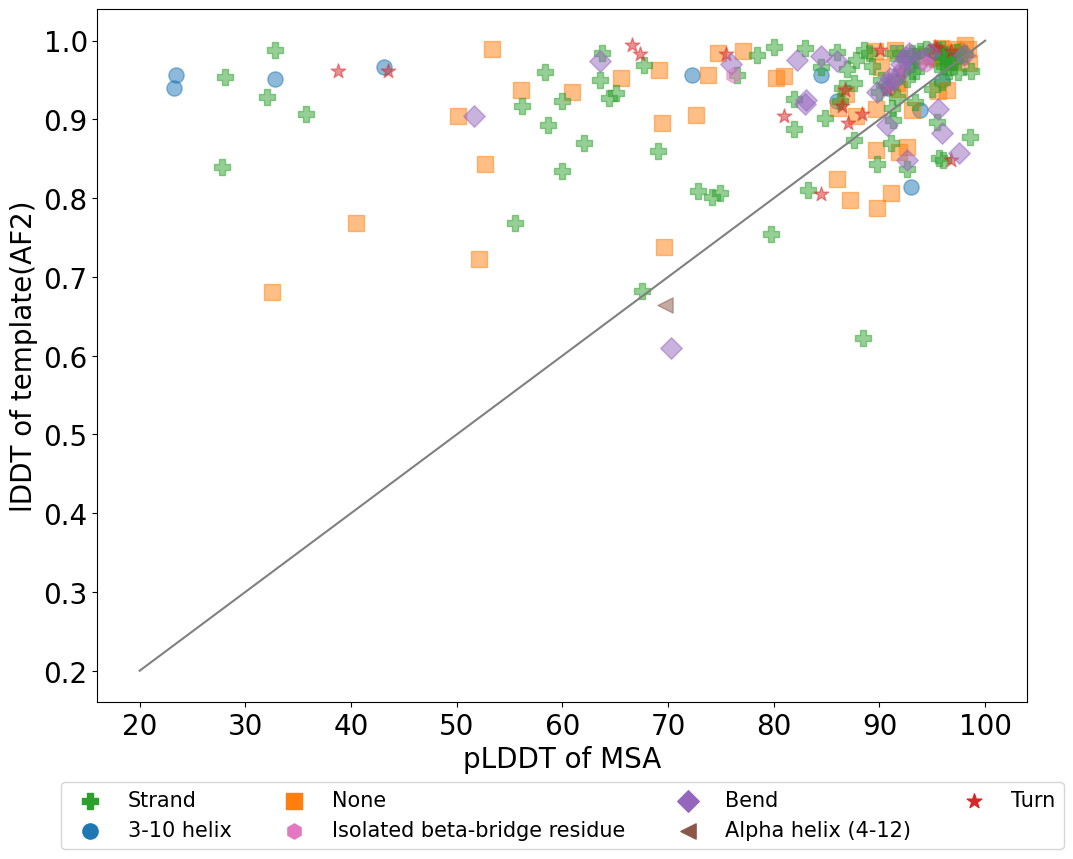

In [8]:
for it, label in enumerate(concat_df["struc_struc"].unique()):
    plt.scatter(
        concat_df[concat_df.struc_struc == label]["af_pLDDT"],
        concat_df[concat_df.struc_struc == label]["local_lddt"],
        label=label,
        marker=markers[it],
        alpha=0.5,
        s=120,
    )
plt.plot([20, 100], [0.20, 1], c="grey")
plt.xlabel("pLDDT of MSA")
plt.ylabel("lDDT of template(AF2)")
handles, labels = plt.gca().get_legend_handles_labels()
legend_dict = {label: handles[it] for it, label in enumerate(labels)}
order = (
    concat_df.groupby("struc_struc")
    .count()["struc_resname"]
    .sort_values(ascending=False)
)
print(order)
print(list(order.index))
ord2 = {(it * 2) % len(order): it for it in range(len(order.index))}
order = [list(order.index)[ord2[it]] for it in range(len(order.index))]

print(order)
leg = plt.legend(
    labels=order,
    handles=[legend_dict[curr] for curr in order],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=4,
)
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.savefig(
    f"figures/CASP14_pLDDT_lDDT.png", dpi=600, bbox_inches="tight", transparent=False
)
plt.savefig(f"figures/CASP14_pLDDT_lDDT.svg", bbox_inches="tight", transparent=False)
plt.show()